In [2]:
!pip install -q pandas==1.5.3


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [24]:

# Imports
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime as dt
import seaborn as sns

print('Panda version:', pd.__version__)


Panda version: 1.5.3


In [4]:

# Reading data
data = pd.read_csv("dados/dataset.csv")
data.head()


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Análise Exporatória

# Colunas
data.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [6]:
#tipos de dados das colunas
data.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [7]:
# Resumo estatístico da col Valor Venda
data["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [8]:
# Verificando registros duplicados
data[data.duplicated]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [9]:
# Verificando valores nulos
data.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [10]:
# 1:Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?    

somatorios = data[data.Categoria == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum()
# print(somatorios.sort_values(by='Valor_Venda', ascending=False))

# Versão Diego:
# cidadeComMaiorValorVenda = somatorios.query('Valor_Venda == Valor_Venda.max()')
# print(cidadeComMaiorValorVenda)

# Versão professor:
cidadeComMaiorValorVenda = somatorios.idxmax()
# print(cidadeComMaiorValorVenda)
print("Maior valor acumulado de venda:", cidadeComMaiorValorVenda)

# Para conferir o resultado
print(somatorios.sort_values(ascending = False))

Maior valor acumulado de venda: New York City
Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64


<Figure size 2000x600 with 0 Axes>

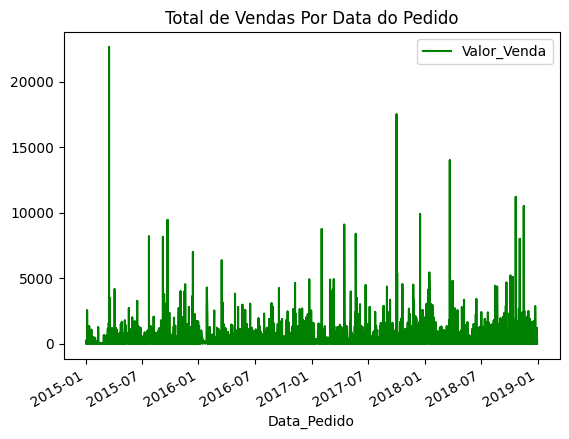

In [11]:
# 2:Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.    

import matplotlib.pyplot as plt
%matplotlib inline



# Versão Diego:
# data["Data_Pedido"] = data["Data_Pedido"].astype('datetime64[ns]')
# total_vendas = data[['Data_Pedido', 'Valor_Venda']].groupby('Data_Pedido').sum()
# print(type(total_vendas))
# total_vendas_ordered = total_vendas.sort_values(by='Data_Pedido', ascending=True)

# plt.bar(total_vendas_ordered.index, total_vendas_ordered['Valor_Venda'].to_numpy(), label = 'Barras', color = 'green')
# plt.legend()
# plt.show()

# Versão Professor melhorada:
data['Data_Pedido'] = pd.to_datetime(data['Data_Pedido'], dayfirst = True)
date_ordered_data = data.sort_values(by="Data_Pedido")
# print(date_ordered_data)

# Plot
plt.figure(figsize = (20, 6))
date_ordered_data.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

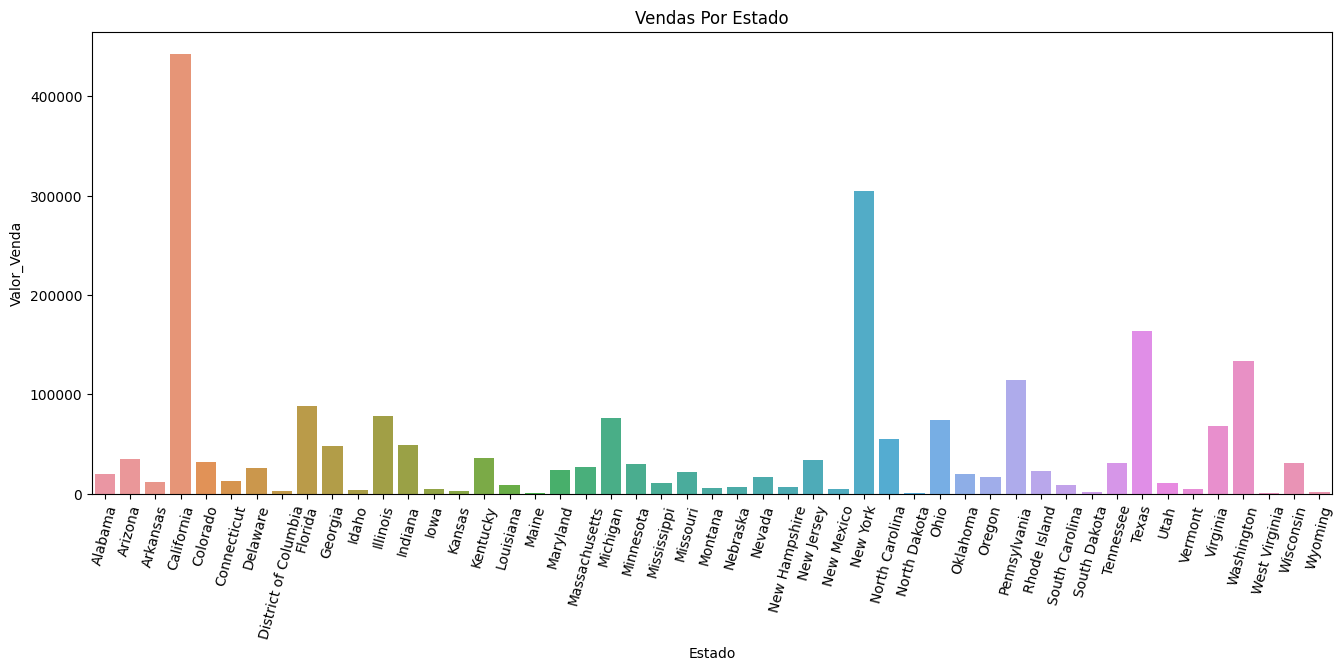

In [12]:
#3 Qual o Total de Vendas por Estado?
# Demonstre o resultado através de um gráfico de barras.

# total_vendas_por_estado = data.groupby('Estado')['Valor_Venda'].sum()
# print(type(total_vendas_por_estado['Valor_Venda']))

# Resposta Diego
# total_vendas_por_estado = data[['Estado', 'Valor_Venda']].groupby('Estado').sum()
# plt.bar(total_vendas_por_estado.index, total_vendas_por_estado['Valor_Venda'].to_numpy(), label = 'Barras', color = 'red')
# plt.legend()
# plt.show()

# Resp Professor
total_vendas_por_estado = data[['Estado', 'Valor_Venda']].groupby('Estado').sum().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(data=total_vendas_por_estado, y='Valor_Venda', x='Estado').set(title="Vendas Por Estado")
plt.xticks(rotation = 75)
plt.show()

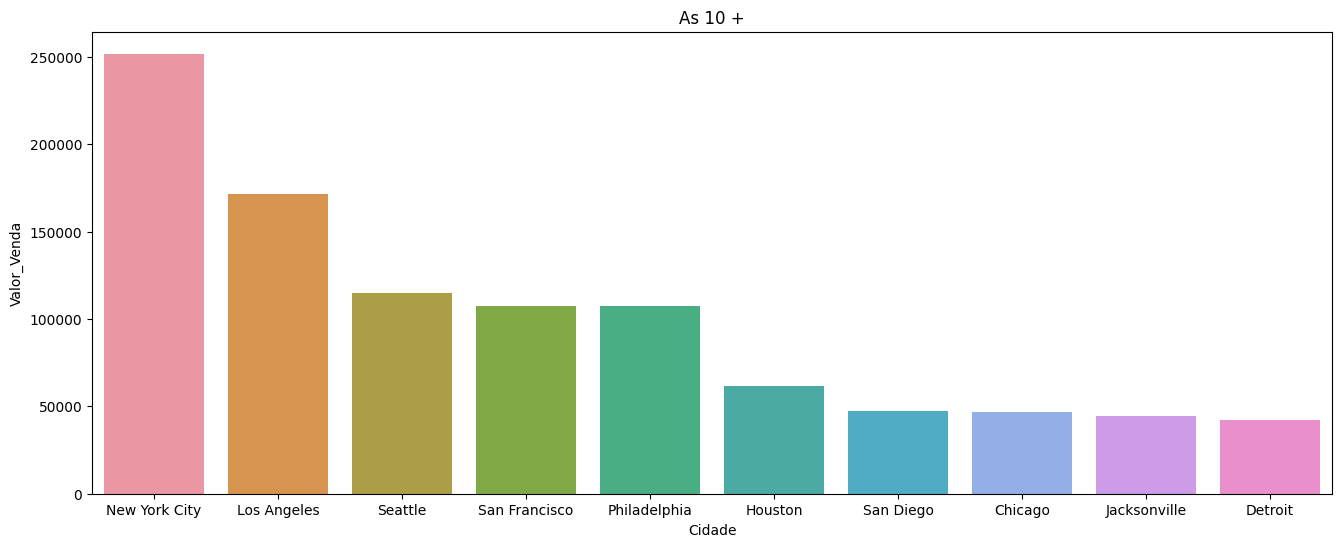

In [13]:
#4 Quais São as 10 Cidades com Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de barras

top_dez = data[['Cidade', 'Valor_Venda']].groupby('Cidade').sum().sort_values(by='Valor_Venda', ascending=False).reset_index().head(10)
# print(top_dez)

plt.figure(figsize=(16,6))
sns.set_palette('coolwarm')
sns.barplot(data=top_dez, x='Cidade', y='Valor_Venda').set(title="As 10 +")
plt.show()


In [14]:
#5 Qual Segmento Teve o Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de pizza.


# segmento_maior_total = data[['Segmento', 'Valor_Venda']].groupby('Segmento').sum()
# print(segmento_maior_total)

# fatias = segmento_maior_total['Valor_Venda'].to_numpy()
# segmentos = segmento_maior_total.index.values
# print(fatias)
# print(segmentos)
# cores = ['olive', 'lime', 'violet']

# plt.pie(fatias, labels = segmentos, colors = cores, startangle = 0, shadow = True, explode = (0,0,0))
# plt.show()



# Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5 = data.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

                                                                                      # Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

print(df_dsa_p5)

      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


In [20]:
#6 Qual o Total de Vendas Por Segmento e Por Ano?
data['Ano'] = data['ID_Pedido'].str.split('-').str[1]


total = data[['Ano', 'Segmento', 'Valor_Venda']].groupby(['Ano', 'Segmento']).sum()
print(total)


                  Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849


In [26]:
#7 Pergunta de Negócio 7 (Desafio Nível Júnior):

# Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

# - Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
# - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?
# vendas_com_15 = data.query("Valor_Venda > 1000").size

data["Desconto"] = np.where(data['Valor_Venda'] > 1000, 0.15, 0.10)


#data.head()
data["Desconto"].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [28]:
#8 Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

# Criando novo DataFrame para edição: 
vendas_com_15 = data.loc[data["Valor_Venda"] > 1000, ['Valor_Venda'] ]
vendas_com_15["Valor_com_15_desc"] = vendas_com_15["Valor_Venda"] * 85 / 100
# print(vendas_com_15)

media_antes = vendas_com_15.Valor_Venda.mean()
print('Media antes:', round(media_antes, 2))

media_depois = vendas_com_15.Valor_com_15_desc.mean()
print('Media depois:', round(media_depois, 2))



Media antes: 2116.81
Media depois: 1799.29


In [34]:
#9 Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

data["Mes"] = data["Data_Pedido"].dt.month
# data_p9 = data.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
data_p9 = data.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean()

anos = data_p9.index.get_level_values(0)
meses = data_p9.index.get_level_values(1)
segmentos = data_p9.index.get_level_values(2)

# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = data_p9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

ValueError: Could not interpret value `mean` for parameter `y`

<Figure size 1200x600 with 0 Axes>

In [ ]:
#10Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?  Demonstre tudo através de um único gráfico.